In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from utils.augmentation import get_training_augmentation, get_preprocessing, offline_augmentation
from sklearn.model_selection import train_test_split
import random
import cv2

### This notebook is to create visualizations used in the thesis

In [6]:
############## Visualize IR ################
def visualize_ir(img, idx=None, cmap='cividis', colorbar=False, save_path=None):
    plt.imshow(img, cmap=cmap)

    if colorbar:
        plt.colorbar()
    
    if not save_path==None:
        #img = np.clip(img, 273, 276)
        #cv2.imwrite(os.path.join(save_path, '{}.png'.format(idx)), img)
        plt.imsave(os.path.join(save_path, '{}.png'.format(idx)), img, cmap='gray')

In [3]:
def visualize_random_pairs(imgs, masks, cmap='cividis'):
    image_number = random.randint(0, len(imgs))
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(imgs[image_number], cmap=cmap)
    plt.subplot(122)
    plt.imshow(masks[image_number], cmap=cmap)
    #plt.imshow(np.reshape(masks[image_number], (256, 256)), cmap='gray')
    plt.show()

In [4]:
def visualize_pairs(imgs, masks, idx, cmap='cividis'):
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(imgs[idx], cmap=cmap)
    #plt.imshow(imgs[idx, :,:, 0], cmap=cmap)
    plt.subplot(122)
    plt.imshow(masks[idx], cmap=cmap)
    #plt.imshow(np.reshape(masks[image_number], (256, 256)), cmap='gray')
    plt.show()

In [2]:
X32 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/32_im.npy')
y32 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/32_ma.npy')
X64 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/64_im.npy')
y64 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/64_ma.npy')
X128 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/128_im.npy')
y128 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/128_ma.npy')
X256 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/256_im.npy')
y256 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/256_ma.npy')
X480 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/480_im.npy')
y480 = np.load('E:/polar/code/data/ir/entire/original_size/ims_raw_np/480_ma.npy')

In [3]:
# train test baseline
trainX = np.load('E:/polar/code/data/ir/prefinal/resnet_xtrain.npy')
trainy = np.load('E:/polar/code/data/ir/prefinal/resnet_ytrain.npy')
testX = np.load('E:/polar/code/data/ir/prefinal/resnet_xtest.npy')
testy = np.load('E:/polar/code/data/ir/prefinal/resnet_ytest.npy')

#### Image pairs

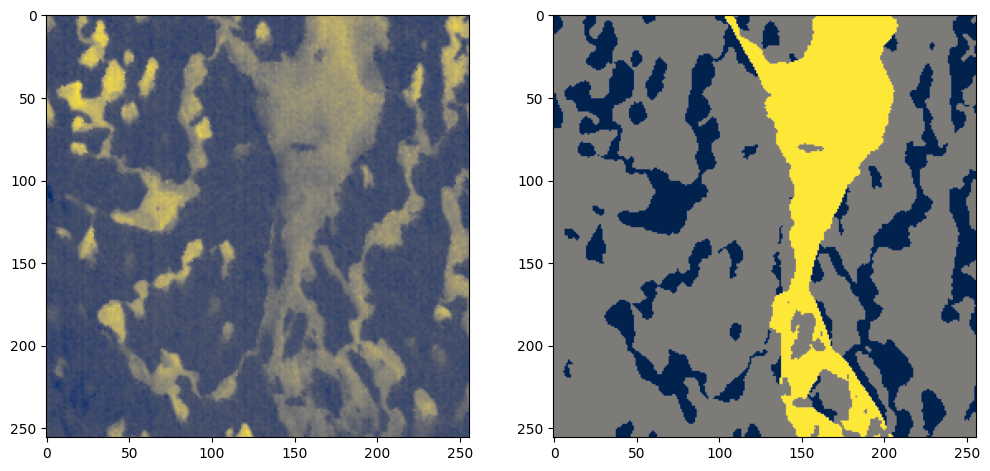

In [42]:
visualize_pairs(testX,testy,3)

#### Augmentation Results

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X256, y256, test_size=0.2, random_state=42)

X_train_new, y_train_new, imaug, maaug = offline_augmentation(X_train, y_train, im_size=256, mode=1)

print(X_train_new.shape)

save_path = 'E:/polar/code/data/ir/test_augmentation/'

for idx, i in enumerate(imaug):
    cv2.imwrite(os.path.join(save_path, '{}.png'.format(idx)), i)
for idx, i in enumerate(X_train):
    print(np.unique(i))
    
    cv2.imwrite(os.path.join(save_path, '{}masks.png'.format(idx)), i)


(50, 256, 256)
[ 44  47  48  51  52  54  55  56  58  59  60  62  63  64  65  67  68  69
  70  71  72  73  75  76  77  78  79  80  81  83  84  85  86  87  88  89
  91  92  93  94  95  96  97  99 100 101 102 103 104 105 107 108 109 110
 111 112 113 115 116 117 118 119 120 121 123 124 125 126 127 128 129 130
 131 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 247 248
 255]
[  0   4   6   7   9  10  11  13  14  15  16  17  18  19  20  21  22  23
  24  25  26  27  28  29  30  31  32  34  35  36  38  39  40  42  43  44
  46  47  48  50  51  52  54  55  56  58  59  60  62  63  64  65  67  68
  69  70  71  72  73  75  76  

In [51]:
save_path = 'E:/polar/code/data/ir/test_augmentation/'

for idx, elem in enumerate(X_train):
    cv2.imwrite(os.path.join(save_path, '{}.png'.format(idx)), elem)
for idx, elem in enumerate(y_train):
    cv2.imwrite(os.path.join(save_path, '{}masks.png'.format(idx)), elem)

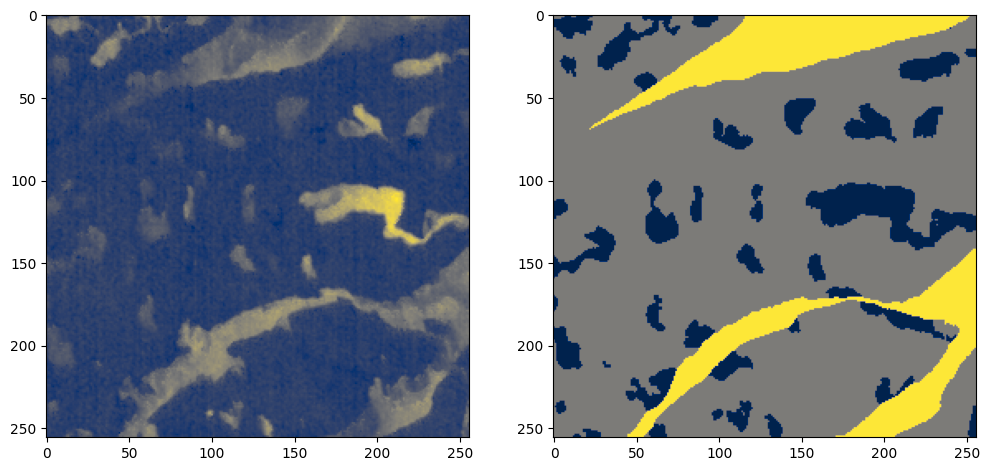

In [26]:
visualize_pairs(X_train_new, y_train_new, 8)

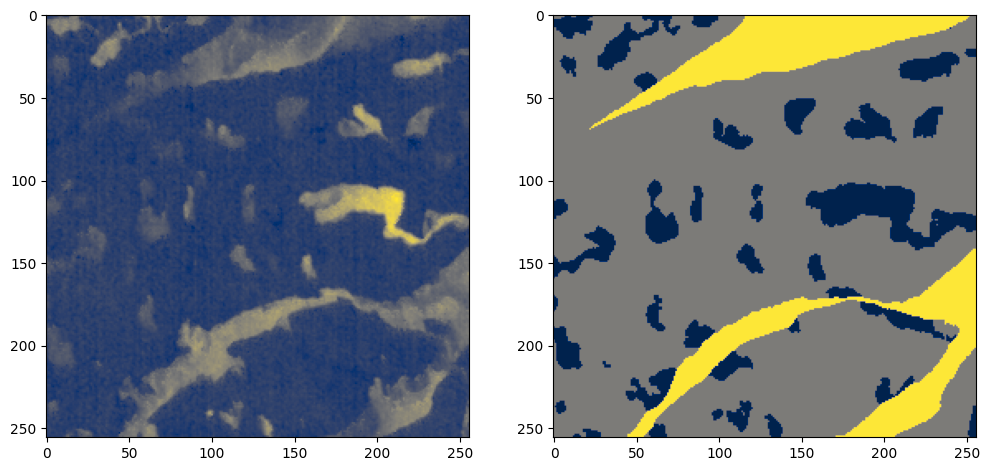

In [24]:
visualize_pairs(X_train, y_train, 1)

#### Model Predictions

In [ ]:
def expand_greyscale_channels(image):
    image = np.expand_dims(image, -1)
    image = image.repeat(3, axis=-1)
    return image


def crop_center_square(image, im_size=480):
    size=im_size
    height, width = image.shape[:2]
    new_width = new_height = size
    left = (width - new_width) // 2
    top = (height - new_height) // 2
    right = left + new_width
    bottom = top + new_height
    cropped_image = image[top:bottom, left:right]
    return cropped_image

def transform_color(image):
    uniques = np.unique(image)
    
    for idx,elem in enumerate(uniques):
        mask = np.where(image == 1)
        image[mask] = 125
        mask2 = np.where(image == 2)
        image[mask2] = 255
    return image

def preprocess_prediction(image):
    image = expand_greyscale_channels(image)
    image = image.astype(np.float32)
    # will add a dimension that replaces batch_size
    image = np.expand_dims(image, axis=0)
    
    return image

In [ ]:
def patch_predict(model, image, patch_size):
    """
    Predicts on image patches and recombines masks to whole image later.
    
    This function is inspired by
    https://github.com/bnsreenu/python_for_microscopists/blob/master/206_sem_segm_large_images_using_unet_with_custom_patch_inference.py
    
    """

    # initialize mask with zeros
    segm_img = np.zeros(image.shape[:2])
    patch_num=1
    # Iterates through image in steps of patch_size, operates on patches
    for i in range(0, image.shape[0], patch_size):
        for j in range(0, image.shape[1], patch_size):
            single_patch = image[i:i+patch_size, j:j+patch_size]
            single_patch_shape = single_patch.shape[:2]
            single_patch = preprocess_prediction(single_patch)
            pr_mask = model.predict(single_patch)
            # removes batch dimension and channel dimension by replacing the latter with class with maximum probability value
            pr_mask_processed = np.argmax(pr_mask.squeeze(), axis=2)
            # make mask values visible
            fin = transform_color(pr_mask_processed)
            # recombine to complete image
            segm_img[i:i+single_patch_shape[0], j:j+single_patch_shape[1]] += cv2.resize(fin, single_patch_shape[::-1])
            print("Finished processing patch number ", patch_num, " at position ", i,j)
            patch_num+=1

    return segm_img